In [309]:
import pickle
from glob import glob
import numpy as np

idx = 6500 # np.random.randint(0, 3000)
all_push_data = []


In [310]:
i = 0
data_dir = "/common/users/dm1487/namo_data/nov17/1_push"
for file in glob(data_dir + "/*/*/*.pkl"):
    try:
        with open(file, "rb") as f:
            data = pickle.load(f)
            episode_results = data['episode_results']
            if len(episode_results) > 0:
                for ep_idx in range(len(episode_results)):
                    if episode_results[ep_idx]['solution_found']:
                        episode_results[ep_idx]['algorithm_stats']['solutions_total_for_neighbour'] / episode_results[ep_idx]['algorithm_stats']['pushes_total_for_neighbour']
                        all_push_data.append((episode_results[ep_idx], episode_results[ep_idx]['algorithm_stats']['solutions_total_for_neighbour'] / episode_results[ep_idx]['algorithm_stats']['pushes_total_for_neighbour']))
            
    except Exception as e:
        print(e)
        continue
    i += 1
    if i > idx:
        break
data.keys()

No module named 'namo_rl'
No module named 'namo_rl'


dict_keys(['task_id', 'success', 'episodes_collected', 'episodes_before_filtering', 'episodes_filtered_out', 'processing_time', 'episode_results'])

In [315]:
easy = []
medium = []
hard = []
for ep_res, p in all_push_data:
    if p > 0.75:
        easy.append(ep_res)
    elif p > 0.25 and p <= 0.75:
        medium.append(ep_res)
    else:
        hard.append(ep_res)

In [316]:
len(easy), len(medium), len(hard)

(9217, 27170, 17196)

In [296]:
episode_results = data['episode_results']
if len(episode_results) > 0:
    print(episode_results[0].keys())

dict_keys(['episode_id', 'algorithm', 'algorithm_version', 'success', 'solution_found', 'solution_depth', 'search_time_ms', 'nodes_expanded', 'terminal_checks', 'max_depth_reached', 'action_sequence', 'algorithm_stats', 'error_message', 'failure_code', 'failure_description', 'original_action_sequence', 'smoothing_stats', 'original_state_observations', 'original_post_action_state_observations', 'state_observations', 'post_action_state_observations', 'reachable_objects_before_action', 'reachable_objects_after_action', 'refined_action_sequence', 'refinement_accepted', 'refinement_stats', 'static_object_info', 'xml_file', 'robot_goal'])


In [268]:

sols = []
sols_dict = {}
for i in range(len(episode_results)):
    if episode_results[i]['solution_found']:
        sols.append(episode_results[i]['algorithm_stats']['neighbour_region_label'])
        if episode_results[i]['algorithm_stats']['neighbour_region_label'] not in sols_dict:
            sols_dict[episode_results[i]['algorithm_stats']['neighbour_region_label']] = episode_results[i]['algorithm_stats']['solutions_total_for_neighbour'] / episode_results[i]['algorithm_stats']['pushes_total_for_neighbour']
            print(episode_results[i]['algorithm_stats']['neighbour_region_label'], episode_results[i]['algorithm_stats']['solutions_total_for_neighbour'], episode_results[i]['algorithm_stats']['pushes_total_for_neighbour'])

from collections import Counter
Counter(sols), sols_dict
    

goal 1 15
region_3 7 58


(Counter({'region_3': 7, 'goal': 1}),
 {'goal': 0.06666666666666667, 'region_3': 0.1206896551724138})

In [252]:
episode_results[0]['solution_found']

False

In [387]:
image_dir = "/common/users/dm1487/namo_data/images/nov17/1_push"

for file in glob(image_dir + "/medium/*/*.npz"):
    data = np.load(file)
    if np.random.uniform() < 0.1:
        break

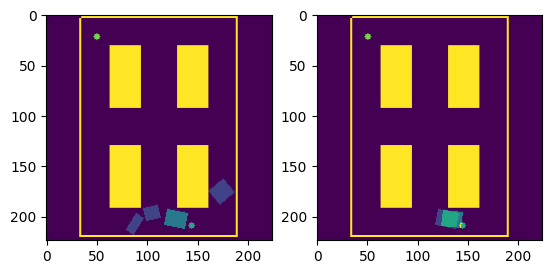

In [388]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots(1, 2)
ax[0].imshow(data['robot']*3 + data['movable'] + data['static']*5 + data['goal']*4 + data['target_object'])
ax[1].imshow(data['robot']*3 + data['static']*5 + data['target_object']  + data['target_goal']*2 + data['goal']*4)
plt.show()

In [338]:
data.keys()


KeysView(NpzFile '/common/users/dm1487/namo_data/images/nov17/1_push/hard/ilab2_env_003542/ilab2_env_003542_episode_0_neighbour_0_goal.npz' with keys: robot, goal, movable, static, reachable...)

In [339]:
for k, v in data.items():
    print(k, v.shape)

robot (224, 224)
goal (224, 224)
movable (224, 224)
static (224, 224)
reachable (224, 224)
target_object (224, 224)
target_goal (224, 224)
robot_distance (224, 224)
goal_distance (224, 224)
episode_id (1,)
task_id (1,)
algorithm (1,)
solution_depth (1,)
search_time_ms (1,)
nodes_expanded (1,)
robot_goal (3,)
xml_file (1,)
difficulty_label (1,)
difficulty_score (1,)
num_goal_horizons (1,)
action_object_ids (1,)
action_targets (1, 3)
